# Skuteczność vs wielkość zbioru treningowego
Stwórz wykres jakości modelu ($r^2$ na zbiorze testowym) względem wielkości zbioru treningowego. Opracuj scenariusz eksperymentu, dobierz sposób wizualizacji.
Wygeneruj go wiele razy (bez ustawiania ziaren losowań). Czy obserwujesz coś dziwnego? Spróbuj wyjaśnić z czego to wynika.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X = X.iloc[:, :-2]
print(X)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467
...       ...       ...       ...        ...         ...       ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981

[20640 rows x 6 columns]


In [26]:
train_size = 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_size, random_state=123)
model = LinearRegression()
model.fit(X_train, y_train)

def generate_scores(model, X_test, y_test, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        _, X_test_sample, _, y_test_sample = train_test_split(X_test, y_test, test_size=test_size)
        y_pred_sample = model.predict(X_test_sample)
        scores.append(r2_score(y_test_sample, y_pred_sample))
    return scores

test_size = 1000
num_trials = 10

scores = generate_scores(model, X_test, y_test, test_size, num_trials)
scores

[0.5362703729860089,
 0.5394629291515503,
 0.5218533681068276,
 0.5482684484629352,
 0.5615838164600645,
 0.5215404395462123,
 0.5276390186043023,
 0.6203318337479213,
 0.5564007497002353,
 0.5697561421090094]

In [3]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

[  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100 15100]
[0.5424482185134786, 0.5600691075992414, 0.5419781257903631, 0.5401522419120544, 0.5467969958320996, 0.5388963032425015, 0.5646345046142411, 0.5440104068881466, 0.5426641475096904, 0.5454651322717973, 0.5446756261584708, 0.5437463054182983, 0.5520802680845883, 0.5454305941376539, 0.5440681767396722, 0.5444375355742446]


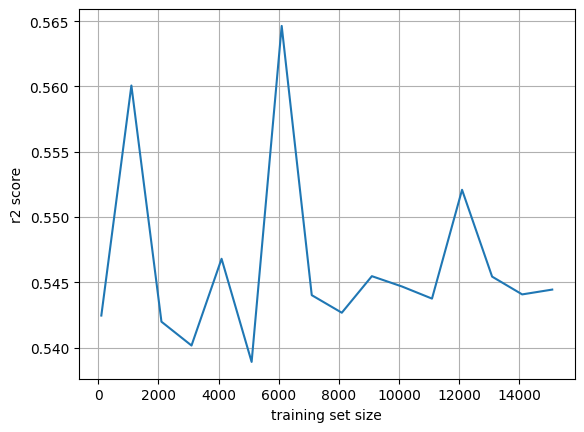

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000)

train_sizes = np.arange(100, X_train.shape[0], 1000)
print(train_sizes)

scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]
print(scores)
plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

In [29]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


<Axes: >

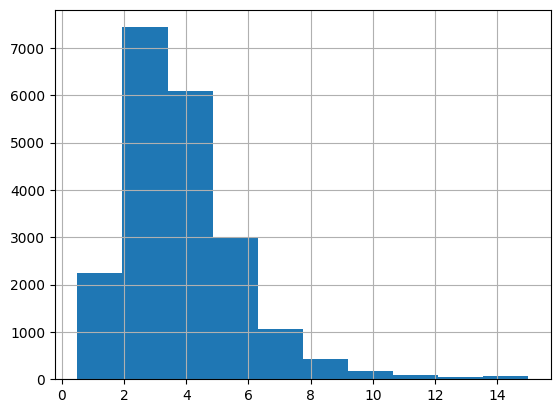

In [30]:
X.MedInc.hist()

<Axes: >

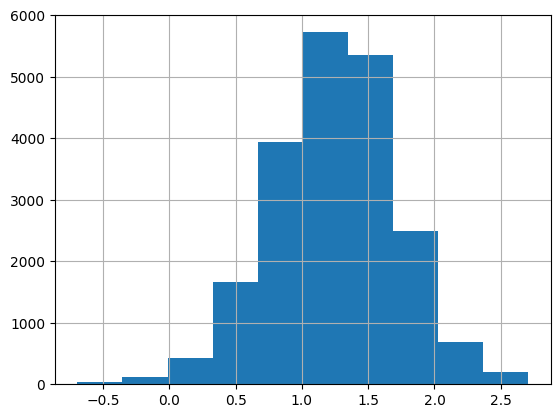

In [31]:
np.log(X.MedInc).hist()

In [32]:
np.quantile(X.AveOccup, q=[0.01, 0.95, 0.97, 0.99, 0.999])

array([ 1.53668647,  4.33341667,  4.63587413,  5.39481203, 13.63044349])

In [33]:
X.describe().AveOccup

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64

In [34]:
X.quantile

<bound method DataFrame.quantile of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467
...       ...       ...       ...        ...         ...       ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981

[20640 rows x 6 columns]>

In [110]:
X.AveOccup

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: AveOccup, Length: 20640, dtype: float64

In [137]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [141]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


### -------------------------------------------------------------------------------------

In [ ]:
for col in X.columns:
    upper_bound = np.percentile(X[col], 99)
    X_new = X[X[col] <= upper_bound]
X_new

In [142]:
for col in X.columns:
    X_99 = X[X.quantile(q=0.99)[col] > X[col]]
X_99


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [ ]:
upper_bound = np.percentile(X.AveOccup, 99)
X_new = X[X.AveOccup <= upper_bound]

print(X_new)

In [ ]:
# for col in X.columns:
#     upper_bound = np.percentile(X[col], 99)
#     X = X[X[col] <= upper_bound]

In [5]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

In [12]:
quantile = 0.99
test_size = 1000
ind = (X <= X.quantile(quantile).values).all(axis=1)
ind

0        True
1        True
2        True
3        True
4        True
         ... 
20635    True
20636    True
20637    True
20638    True
20639    True
Length: 20640, dtype: bool

In [13]:
ind.mean()

np.float64(0.9594961240310077)

[  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100]
[0.5833450636362467, 0.6121742913766066, 0.6106000401438525, 0.611410830527506, 0.6135029612959029, 0.613363260310203, 0.6132149287258735, 0.6129542884024073, 0.6134647056745763, 0.6125688851656661, 0.6135870422823604, 0.6137983595461518, 0.6133160803662776, 0.6132167146203378, 0.6134931917943469]


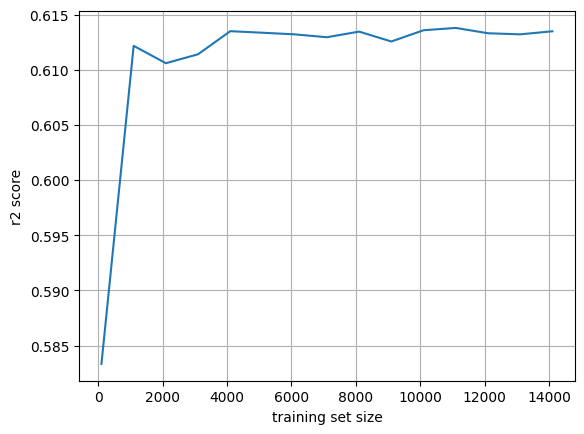

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=5000)

train_sizes = np.arange(100, X_train.shape[0], 1000)
print(train_sizes)

scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]
print(scores)
plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

### -------------------------------------------------------------------------------------

In [32]:
ind = (X <= X.quantile(quantile)).all(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=5000)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
y.min(), y.max()

(np.float64(0.14999), np.float64(5.00001))

In [17]:
y_pred.min(), y_pred.max()

(np.float64(-0.372695448821609), np.float64(6.204753767427263))

0        True
1        True
2        True
3        True
4        True
         ... 
20635    True
20636    True
20637    True
20638    True
20639    True
Length: 20640, dtype: bool
[  100  1100  2100  3100  4100  5100  6100  7100  8100  9100 10100 11100
 12100 13100 14100]
[0.5919469037412706, 0.6250564683823754, 0.6224903332249312, 0.6234583661983577, 0.6241489786731016, 0.6257777698554052, 0.6243989647103829, 0.6252238593989516, 0.624986565473121, 0.6244716427814121, 0.6259753081412079, 0.6257678963058368, 0.6253829291267257, 0.6253988664156084, 0.6254771871735711]


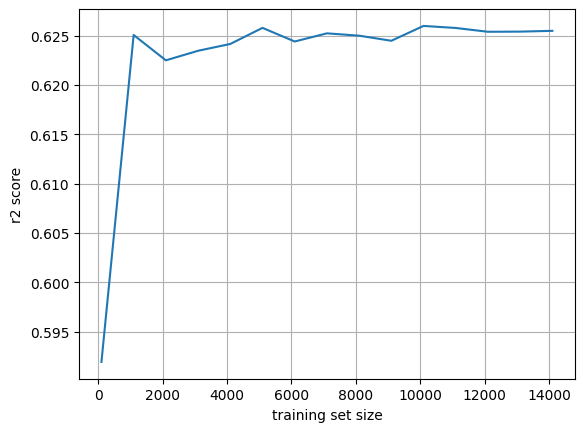

In [24]:
def calculate_r2(X_test, y_test, X_train, y_train, train_size):
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=train_size)
    model = LinearRegression()
    model.fit(X_train_sample, y_train_sample)
    # np.clip - przycinanie danych
    y_pred = np.clip(model.predict(X_test), 0, 5)
    return r2_score(y_test, y_pred)
    
quantile = 0.99

ind = (X <= X.quantile(quantile).values).all(axis=1)
print(ind)
X_train, X_test, y_train, y_test = train_test_split(X[ind], y[ind], test_size=5000)

train_sizes = np.arange(100, X_train.shape[0], 1000)
print(train_sizes)

scores = [calculate_r2(X_test, y_test, X_train, y_train, train_size) for train_size in train_sizes]
print(scores)
plt.plot(train_sizes, scores)
plt.xlabel("training set size")
plt.ylabel("r2 score")
plt.grid()
plt.show()

### -----------------------------------------------------------

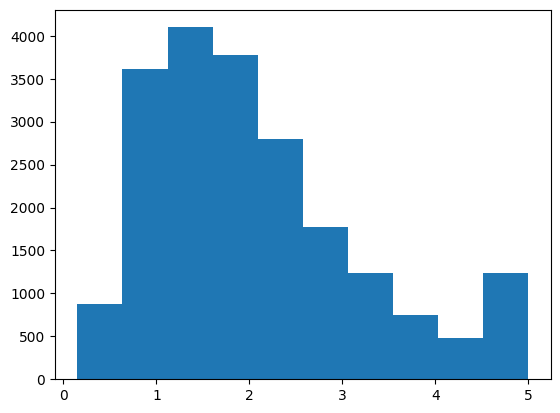

In [25]:
plt.hist(y)
plt.show()

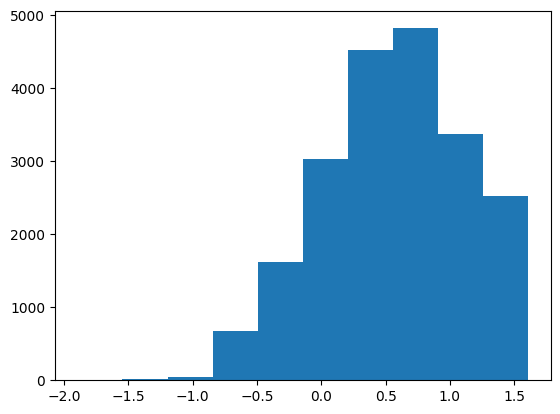

In [26]:
plt.hist(np.log(y))
plt.show()

In [27]:
from sklearn.compose import TransformedTargetRegressor
?TransformedTargetRegressor

Init signature:
TransformedTargetRegressor(
    regressor=None,
    *,
    transformer=None,
    func=None,
    inverse_func=None,
    check_inverse=True,
)
Docstring:     
Meta-estimator to regress on a transformed target.

Useful for applying a non-linear transformation to the target `y` in
regression problems. This transformation can be given as a Transformer
such as the :class:`~sklearn.preprocessing.QuantileTransformer` or as a
function and its inverse such as `np.log` and `np.exp`.

The computation during :meth:`fit` is::

    regressor.fit(X, func(y))

or::

    regressor.fit(X, transformer.transform(y))

The computation during :meth:`predict` is::

    inverse_func(regressor.predict(X))

or::

    transformer.inverse_transform(regressor.predict(X))

Read more in the :ref:`User Guide <transformed_target_regressor>`.

.. versionadded:: 0.20

Parameters
----------
regressor : object, default=None
    Regressor object such as derived from
    :class:`~sklearn.base.RegressorMixin`. 

In [29]:
regresor = TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp)
regresor.fit(X_train, y_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

In [33]:
X_train.shape

(14804, 6)

In [30]:
regresor.predict(X_test)

array([1.28969455, 1.63857911, 5.15280311, ..., 1.08163546, 1.94297817,
       3.86996414])